# Peak Hour Analysis

In this notebook, we identify the hours of the day with the highest ride demand and quantify the magnitude of these peaks. This analysis informs operational decisions regarding driver allocation and demand management.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

AGG_PATH = "../../data/processed/nyc_demand_zone_hour_2019_q1.parquet"

# Show all columns
pd.set_option("display.max_columns", None)

# Load aggregated dataset
df = pd.read_parquet(AGG_PATH)
df.head()

,zone_id,pickup_hour_ts,demand,avg_fare,avg_distance,hour,day_of_week,is_weekend,day,month
0,1,2019-01-01 10:00:00,2,61.25,16.90,10,1,0,1,1
1,1,2019-01-01 12:00:00,1,135.00,19.30,12,1,0,1,1
2,1,2019-01-01 15:00:00,1,106.00,41.28,15,1,0,1,1
3,1,2019-01-02 02:00:00,1,30.00,1.27,2,2,0,2,1
4,1,2019-01-02 03:00:00,1,15.00,12.65,3,2,0,2,1


## Aggregate demand by hour
Demand is aggregated by hour to compute the mean zone-hour demand for each hour of the day.


In [2]:
hourly_demand = df.groupby("hour")["demand"].mean().reset_index()
hourly_demand

,hour,demand
0,0,60.673694
1,1,45.673122
2,2,34.661574
3,3,26.380041
4,4,17.732929
5,5,17.008973
6,6,34.666227
7,7,55.719111
8,8,68.612117
9,9,71.185979


## Peak hours
The hour with the highest average demand is identified as the peak hour.

In [3]:
peak_hour = hourly_demand.loc[hourly_demand["demand"].idxmax(), "hour"]
top_hours = hourly_demand.sort_values("demand", ascending=False).head(3)["hour"].tolist()

peak_hour, top_hours

(np.int32(18), [18, 19, 20])

## Weekday vs Weekend peak hours
Hourly demand is compared between weekdays and weekends to identify whether peak hours differ by day type.

In [4]:
weekday_hourly = df[df["is_weekend"] == 0].groupby("hour")["demand"].mean()
weekend_hourly = df[df["is_weekend"] == 1].groupby("hour")["demand"].mean()

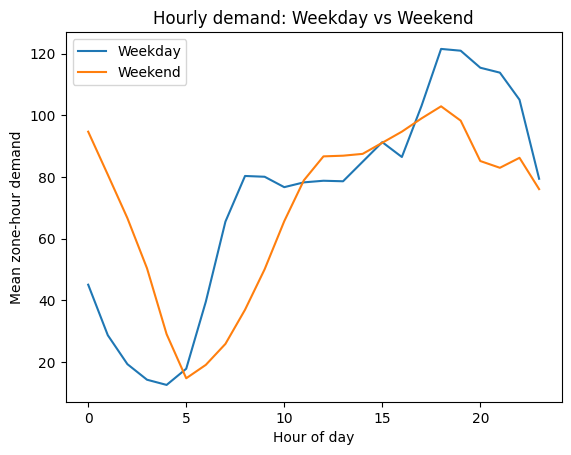

In [5]:
import matplotlib.pyplot as plt

plt.plot(weekday_hourly.index, weekday_hourly.values, label="Weekday")
plt.plot(weekend_hourly.index, weekend_hourly.values, label="Weekend")
plt.xlabel("Hour of day")
plt.ylabel("Mean zone-hour demand")
plt.title("Hourly demand: Weekday vs Weekend")
plt.legend()
plt.show()

## Top zones during peak hour
Examine which zones contribute the most to demand during the identified peak hour.

In [6]:
peak_data = df[df["hour"] == peak_hour]
top_zones = peak_data.groupby("zone_id")["demand"].sum().sort_values(ascending=False).head(5)
top_zones

zone_id
162    67815
161    67341
237    67038
236    60220
230    54366
Name: demand, dtype: int64

## Summary
**Key insights from peak hour analysis:**
- Identified the city-wide peak hour -> 18:00
- Quantified top 3 hours by mean zone-hour demand -> 18:00, 19:00, 20:00
- Compared weekday vs weekend patterns
- Highlighted top zones during peak periods for operational focus